In [10]:
%pip install numpy
%pip install pandas
%pip install kagglehub
%pip install requests
%pip insatll scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "insatll" - maybe you meant "install"



In [11]:
import numpy as np
import pandas as pd
import kagglehub

In [12]:
path = kagglehub.dataset_download('tmdb/tmdb-movie-metadata')
print ('TMDB path = ', path)

TMDB path =  C:\Users\student\.cache\kagglehub\datasets\tmdb\tmdb-movie-metadata\versions\2


In [13]:
df1 = pd.read_csv(str(path +'/tmdb_5000_credits.csv'))
df2 = pd.read_csv(str(path +'/tmdb_5000_movies.csv'))
print('df1 shape is' , df1.shape)
print('df2 shape is ', df2.shape)

df1 shape is (4803, 4)
df2 shape is  (4803, 20)


In [14]:
df1.columns = ['id', 'title_1', 'cast', 'crew']
df2 = df2.merge(df1, on='id')
print('df2 shape is', df2.shape)

df2 shape is (4803, 23)


In [15]:
C = df2['vote_average'].mean()
print (C)

m = df2['vote_count'].quantile(0.9)
print (m)
q_movies = df2.copy().loc[df2['vote_count'] >=m]
q_movies.shape

6.092171559442016
1838.4000000000015


(481, 23)

In [ ]:
def weithted_rating(x, m=m, C=C):
    v = [x['vote_count']]
    R = x['vote_average']
    return (v/(v+m)*R) + (m/(m+v)*C)

    



In [20]:
q_movies['score'] = q_movies.apply(weithted_rating, axis=1)

In [22]:
q_movies = q_movies.sort_values('score', ascending = False)
q_movies[['title', 'vote_count' , 'vote_average' , 'score']].head(3)


,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,[8.059257641324471]
662,Fight Club,9413,8.3,[7.939256287651155]
65,The Dark Knight,12002,8.2,[7.92002024470956]


In [10]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, 'Popular Movies')

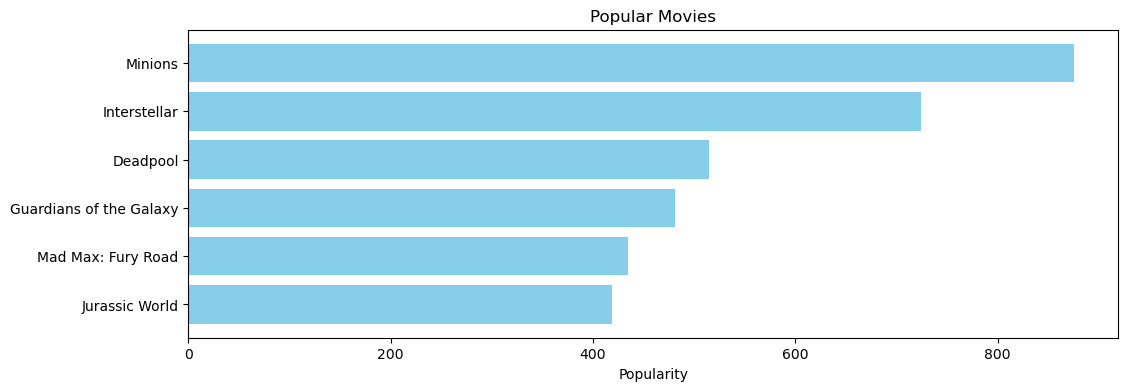

In [23]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

In [24]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [25]:
#pip install scikit-learn

In [26]:

from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(stop_words='english')


df2['overview'] = df2['overview'].fillna('')


tfidf_matrix = tfidf.fit_transform(df2['overview'])


tfidf_matrix.shape

(4803, 20978)

In [27]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [28]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

In [30]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

In [31]:
get_recommendations('Star Wars')

1990                     The Empire Strikes Back
1490                          Return of the Jedi
833                                Shanghai Noon
1290                    Baahubali: The Beginning
2864                                   Arbitrage
2556                          The Princess Bride
410                                Mirror Mirror
2929                History of the World: Part I
1045    The Princess Diaries 2: Royal Engagement
2232                                 Topsy-Turvy
Name: title, dtype: object

In [32]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [33]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [34]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [35]:
# Define new director, cast, genres and keywords features that are in a suitable form.
df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [36]:
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [37]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [38]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

In [39]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) +' '+ x['director'] +' ' +' '.join(x['genres'])

In [40]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) +' '+ x['director'] +' ' +' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup,  axis=1)

In [41]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [42]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [43]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
    df2['soup'] = df2.apply(create_soup, axis=1)

In [44]:
# Reset index of our main DataFrame and construct reverse mapping as before
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

In [45]:
get_recommendations('Star Wars', cosine_sim2)

1990                         The Empire Strikes Back
1490                              Return of the Jedi
229     Star Wars: Episode III - Revenge of the Sith
230     Star Wars: Episode II - Attack of the Clones
233        Star Wars: Episode I - The Phantom Menace
260                                     Ender's Game
4401                             The Helix... Loaded
83                                        The Lovers
193                                      After Earth
4117                              Six-String Samurai
Name: title, dtype: object

In [ ]:
import requests
import json
import tkinter as tk

api_key = '7623e4feb0e8625208b10a157e5a47a8'

root = tk.Tk()
root.title ('The Movie DataBase')
root.geometry ('500x500')

label_movie = tk.Label(root, text='Movie ID')
label_movie.pack(pady=(15,5))
entry_movie = tk.Entry(root, width = 25)
entry_movie.pack()

show_variable = tk.StringVar()
show_area = tk.Label(root, 
     textvariable = show_variable,
     font = ('Helvetica', 12),
     bg = 'lightyellow',
     wraplength = 380,
     justify = 'left')
show_area.pack(pady=20, padx=10, fill='both', expand=True)

def print_movie():
    movie_id = entry_movie.get()
    print ('Moive ID = ', movie_id)
    print ('-'*30)

button_print = tk.Button(root, text = 'Print', command = print_movie)
button_print.pack(pady=15)

def print_recommendations():
    movie_id = entry_movie.get()
    url = f'https://api.themoviedb.org/3/movie/{movie_id}?api_key={api_key}'
    response = requests.get(url)
    data = response.json()
    title_name = data.get('title')
    print ('Title Name = ', title_name)
    print ('-' * 30)

    show_variable.set(get_recommendations(title_name, cosine_sim2))

button_recommendations = tk.Button(root, text='Recommend Movie', command=print_recommendations)
button_recommendations.pack(pady=15)

root.mainloop()

Moive ID =  11
------------------------------
Title Name =  Star Wars
------------------------------
